<a href="https://colab.research.google.com/github/hao1zhao/case-study/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l
!pip install matplotlib_inline
import random
import torch
from d2l import torch as d2l

In [ ]:
!pip install matplotlib==3.0.0


$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$

In [29]:
#construct a data set based on a linear model with noise
def synthetic_data(w, b, num_examples):  
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # noise
    return X, y.reshape((-1, 1))

In [30]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [31]:
print('features:', features[0:5],'\nlabel:', labels[0:5])

features: tensor([[-0.7648, -0.2783],
        [ 0.3612, -1.0825],
        [-0.2281, -1.4934],
        [-0.3378,  0.0255],
        [-0.9763, -0.9224]]) 
label: tensor([[3.6292],
        [8.6248],
        [8.8157],
        [3.4382],
        [5.3887]])


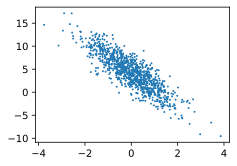

In [32]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [33]:
#load dataset
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # load random sample
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) #min for edge case
        yield features[batch_indices], labels[batch_indices] #output x and y

In [34]:
# Initialize  parameters
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [35]:
# linear regression
def linreg(X, w, b):  
    return torch.matmul(X, w) + b

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$


In [36]:
# loss function
def squared_loss(y_hat, y):  
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

In [37]:
#Small batch  gradient descent
def sgd(params, lr, batch_size): 
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() # Set the next graudent to 0

In [38]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

In [43]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # loss of x and y
        # l shape is(batch_size,1), sum l to cacualte [w,b] gradient
        
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # update parameters
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000050
epoch 2, loss 0.000050
epoch 3, loss 0.000050


In [44]:
print(f'w error: {true_w - w.reshape(true_w.shape)}')
print(f'b error: {true_b - b}')

w error: tensor([-0.0004,  0.0002], grad_fn=<SubBackward0>)
b error: tensor([-7.2002e-05], grad_fn=<RsubBackward1>)
